In [1]:
import pandas as pd

In [2]:
alldata = pd.read_csv('d:/AI/bossbase/boin.csv')
alldata.columns

Index(['岗位名称', '区位', '薪资', '工作经验', '学历', '关键词1', '关键词2', '关键词3', '企业名称',
       '企业类别', '企业规模', '岗位要求', '更新时间'],
      dtype='object')

In [3]:
# 根据条件筛选数据
condition = alldata['岗位名称'].str.contains('数据挖掘')
data = alldata[~condition]

In [4]:
len(data)

1306

## 薪资格式统一

In [5]:
import re
def convert_salary(sal):
    match = re.match(r'^(\d{4,})-(\d{4,})元/月$', sal)
    if match:
        start, end = match.groups()
        return f'{int(int(start) / 1000)}-{int(int(end) / 1000)}K'
    return sal

data["薪资"] = data["薪资"].apply(convert_salary)

C:\Users\zdong\AppData\Local\Temp\ipykernel_22580\1284005864.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["薪资"] = data["薪资"].apply(convert_salary)


In [6]:
sar_set = set(data["薪资"])
def extract_numbers(salary_range):
    # (?:...)：非捕获分组，表示其中的内容是一个整体，但不会被捕获
    # (\d+)：捕获分组，匹配一个或多个数字
    # ?：表示前面的部分是可选的，即可能存在，也可能不存在
    match = re.match(r'^(\d{1,3})-(\d{1,3})K(?:·(\d+)薪)?$', salary_range)
    if match:
        start, end, bonus = match.groups()
        return int(start), int(end), int(bonus) if bonus else 0
    return 0, 0, 0

# 对集合进行排序
sorted_sal = sorted(sar_set, key=lambda x: extract_numbers(x))

In [7]:
sal2inx = {k:v for v,k in enumerate(sorted_sal)}
sal2inx

{'120-150元/时': 0,
 '1000-1500元/周': 1,
 '2-3K': 2,
 '3-4K': 3,
 '3-5K': 4,
 '3-6K': 5,
 '3-8K': 6,
 '4-5K': 7,
 '4-7K': 8,
 '4-8K': 9,
 '5-6K': 10,
 '5-10K': 11,
 '6-8K': 12,
 '6-10K': 13,
 '7-8K': 14,
 '7-9K': 15,
 '7-12K': 16,
 '8-12K': 17,
 '8-12K·13薪': 18,
 '8-13K': 19,
 '8-14K': 20,
 '9-12K': 21,
 '9-14K': 22,
 '10-11K': 23,
 '10-15K': 24,
 '10-15K·14薪': 25,
 '10-20K': 26,
 '11-12K·13薪': 27,
 '11-18K': 28,
 '11-19K·13薪': 29,
 '11-20K': 30,
 '11-22K': 31,
 '12-13K': 32,
 '12-15K': 33,
 '12-16K': 34,
 '12-16K·13薪': 35,
 '12-18K·13薪': 36,
 '12-20K': 37,
 '12-20K·14薪': 38,
 '12-22K': 39,
 '12-22K·14薪': 40,
 '12-24K': 41,
 '12-24K·13薪': 42,
 '12-24K·14薪': 43,
 '12-24K·15薪': 44,
 '12-24K·18薪': 45,
 '13-18K': 46,
 '13-20K': 47,
 '13-20K·13薪': 48,
 '13-22K': 49,
 '13-22K·13薪': 50,
 '13-26K·13薪': 51,
 '14-15K': 52,
 '14-18K': 53,
 '14-22K': 54,
 '15-20K': 55,
 '15-20K·13薪': 56,
 '15-20K·15薪': 57,
 '15-21K': 58,
 '15-22K': 59,
 '15-22K·14薪': 60,
 '15-23K': 61,
 '15-25K': 62,
 '15-25K·14薪': 6

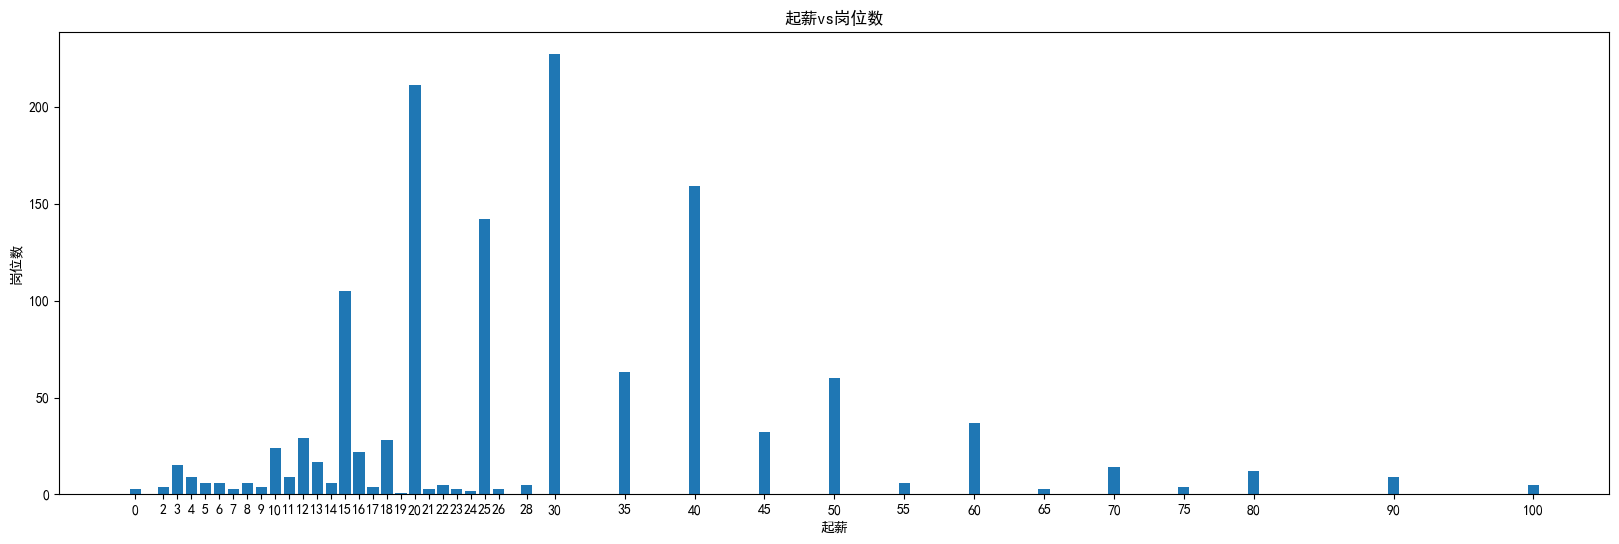

In [8]:
import matplotlib.pyplot as plt

sal_num_dic = {}
sal2low = {}
for i in data["薪资"]:
    j,_,_ = extract_numbers(i)
    sal2low[i] = int(j)
    sal_num_dic[j] = sal_num_dic.get(j, 0) + 1
# 按key的大小升序排序
sorted_data = sorted(sal_num_dic.items())

# 提取排序后的key和value
keys, values = zip(*sorted_data)
# 定义图像大小
plt.figure(figsize=(20, 6))
# 绘制柱状图
plt.bar(keys, values)

# 添加标题和标签
plt.title('起薪vs岗位数')
plt.xlabel('起薪')
plt.ylabel('岗位数')

# 设置X轴刻度位置和标签
plt.xticks(keys)

# 显示图形
plt.show()

In [9]:
# data["薪资"] = data["薪资"].map(sal2inx) # 比较精细的量化方案，方便后续模型训练
data["薪资"] = data["薪资"].map(sal2low) # 直接转换成起薪值，可读性强

C:\Users\zdong\AppData\Local\Temp\ipykernel_22580\2602316995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["薪资"] = data["薪资"].map(sal2low) # 直接转换成起薪值，可读性强


## 工作经验量化

In [10]:
len(set(data["工作经验"]))

7

In [11]:
exp_set = set(data["工作经验"])
exp_set

{'1-3年', '10年以上', '1年以内', '3-5年', '5-10年', '应届生', '经验不限'}

In [12]:
exp2inx = {'经验不限':0,'应届生':1,'1年以内':2, '1-3年':3, '3-5年':4, '5-10年':5, '10年以上':6,}
data["工作经验"] = data["工作经验"].map(exp2inx)

C:\Users\zdong\AppData\Local\Temp\ipykernel_22580\3051762287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["工作经验"] = data["工作经验"].map(exp2inx)


## 更新时间量化

In [13]:
time_set = set(data["更新时间"])
def extract_time(time_range):
    match = re.match(r'.+(\d{2})-(\d{2})$', str(time_range))
    if match:
        start, end = match.groups()
        return int(start), int(end)
    return 0, 0

# 对集合进行排序
sorted_time = sorted(time_set, key=lambda x: (extract_time(x)))

In [14]:
time2inx = {k:v for v,k in enumerate(sorted_time)}
time2inx

{'更新于：2023-11-10': 0,
 '更新于：2023-11-11': 1,
 '更新于：2023-11-12': 2,
 '更新于：2023-11-13': 3,
 '更新于：2023-11-14': 4,
 '更新于：2023-11-15': 5,
 '更新于：2023-11-16': 6,
 '更新于：2023-11-17': 7,
 '更新于：2023-11-18': 8,
 '更新于：2023-11-19': 9,
 '更新于：2023-11-21': 10,
 '更新于：2023-11-22': 11,
 '更新于：2023-11-23': 12,
 '更新于：2023-11-24': 13,
 '更新于：2023-11-25': 14,
 '更新于：2023-11-26': 15,
 '更新于：2023-11-27': 16,
 '更新于：2023-11-28': 17,
 '更新于：2023-11-29': 18,
 '更新于：2023-11-30': 19,
 '更新于：2023-12-01': 20,
 '更新于：2023-12-02': 21,
 '更新于：2023-12-03': 22,
 '更新于：2023-12-04': 23,
 '更新于：2023-12-05': 24,
 '更新于：2023-12-06': 25,
 '更新于：2023-12-07': 26,
 '更新于：2023-12-08': 27,
 '更新于：2023-12-09': 28,
 '更新于：2023-12-10': 29,
 '更新于：2023-12-11': 30,
 '更新于：2023-12-12': 31,
 '更新于：2023-12-13': 32}

In [15]:
data["更新时间"] = data["更新时间"].map(time2inx)

C:\Users\zdong\AppData\Local\Temp\ipykernel_22580\574608217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["更新时间"] = data["更新时间"].map(time2inx)


## 企业规模量化

In [16]:
scale_set = set(data["企业规模"])
def extract_scale(scale):
    match = re.match(r"^(\d+)",str(scale))
    if match:
        return int(match.groups()[0])
    return -1

# data["企业规模"] = data["企业规模"].apply(extract_scale)
sorted_scale = sorted(scale_set, key=lambda x: extract_scale(x))
sca2inx = {k:v for v,k in enumerate(sorted_scale)}
sca2inx

{nan: 0,
 '0-20人': 1,
 '20-99人': 2,
 '100-499人': 3,
 '500-999人': 4,
 '1000-9999人': 5,
 '10000人以上': 6}

In [17]:
data["企业规模"] = data["企业规模"].map(sca2inx)

C:\Users\zdong\AppData\Local\Temp\ipykernel_22580\1938413067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["企业规模"] = data["企业规模"].map(sca2inx)


## 学历量化

In [18]:
edu_set = set(data["学历"])
edu_set

{'博士', '大专', '学历不限', '本科', '硕士'}

In [19]:
edu2inx = {"学历不限":0,"大专":1,"本科":2,"硕士":3,"博士":4}
data["学历"] = data["学历"].map(edu2inx)

C:\Users\zdong\AppData\Local\Temp\ipykernel_22580\3701817653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["学历"] = data["学历"].map(edu2inx)


## 图

In [20]:
import sweetviz as sv
_report = sv.analyze(data,target_feat = "薪资")
_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

d:\virtualenv\myenv\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 22522 (\N{CJK UNIFIED IDEOGRAPH-57FA}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
d:\virtualenv\myenv\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
d:\virtualenv\myenv\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 31227 (\N{CJK UNIFIED IDEOGRAPH-79FB}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
d:\virtualenv\myenv\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
d:\virtualenv\myenv\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 20114 (\N{CJK UNIFIED IDEOGRAPH-4E92}) missing from current font.
  figure.savefig(as_raw

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [21]:
# # 魔法指令开启matplot交互功能（3D图可拖动）
# %matplotlib widget

d:\virtualenv\myenv\Lib\site-packages\ipympl\backend_nbagg.py:336: UserWarning: Glyph 24037 (\N{CJK UNIFIED IDEOGRAPH-5DE5}) missing from current font.
  self.figure.savefig(buf, format='png', dpi='figure')
d:\virtualenv\myenv\Lib\site-packages\ipympl\backend_nbagg.py:336: UserWarning: Glyph 20316 (\N{CJK UNIFIED IDEOGRAPH-4F5C}) missing from current font.
  self.figure.savefig(buf, format='png', dpi='figure')
d:\virtualenv\myenv\Lib\site-packages\ipympl\backend_nbagg.py:336: UserWarning: Glyph 32463 (\N{CJK UNIFIED IDEOGRAPH-7ECF}) missing from current font.
  self.figure.savefig(buf, format='png', dpi='figure')
d:\virtualenv\myenv\Lib\site-packages\ipympl\backend_nbagg.py:336: UserWarning: Glyph 39564 (\N{CJK UNIFIED IDEOGRAPH-9A8C}) missing from current font.
  self.figure.savefig(buf, format='png', dpi='figure')
d:\virtualenv\myenv\Lib\site-packages\ipympl\backend_nbagg.py:336: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missing from current font.
  self.figure.savefi

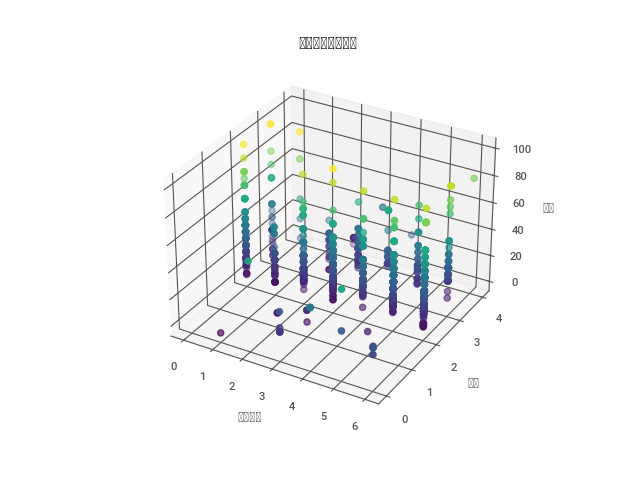

In [22]:
# import numpy as np

# b_name = "企业规模"
# c_name = "学历"

# salaries = data['薪资'].values.reshape(-1, 1)
# b = data[b_name].values.reshape(-1, 1)
# c = data[c_name].values.reshape(-1, 1)

# # 合并薪资、经验和学历数据
# data_3d = np.hstack((b, c,salaries))
# """
# array([[ 1,  2,  3],
#        ...,
#        [ 6,  2, 20],
#        [ 6,  2, 30]], dtype=int64)
# """

# # 创建三维散点图
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # 绘制散点图
# ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], c=data_3d[:, 2], cmap='viridis')
# # ax.autoscale()

# # 设置轴标签
# ax.set_xlabel(b_name)
# ax.set_ylabel(c_name)
# ax.set_zlabel('薪资')

# # 设置刻度值
# # ax.set_xticks(np.unique(data_3d[:, 0]))
# ax.set_yticks(np.unique(data_3d[:, 1]))
# # ax.set_zticks(np.unique(data_3d[:, 2]))

# # 设置图形标题
# plt.title('薪资分布三维点图')

# # 显示图形
# plt.show()